In [2]:
import import_ipynb
import distance 
import data 
import Protonet
import train_and_test
import torch.optim as optim

importing Jupyter notebook from distance.ipynb
importing Jupyter notebook from data.ipynb
importing Jupyter notebook from Protonet.ipynb
importing Jupyter notebook from train_and_test.ipynb


# PREPARE DATA 

In [3]:
%%time 
trainx, trainy = data.read_images('omniglot/images_background')
testx, testy = data.read_images('omniglot/images_evaluation')

CPU times: user 1min 2s, sys: 7.25 s, total: 1min 10s
Wall time: 1min 12s


In [11]:
import matplotlib.pyplot as plt
trainx[1].shape

(28, 28, 3)


# DEFINE THE MODEL AND TRAINING


In [6]:
%%time
model = Protonet.load_protonet_conv(x_dim=(3,28,28),hid_dim=64,z_dim=64)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
n_way = 60
n_support = 5
n_query = 5

train_x = trainx
train_y = trainy

max_epoch = 5
epoch_size = 500

train_and_test.train(model, optimizer, train_x, train_y, n_way, n_support, n_query, max_epoch, epoch_size)

  0%|          | 0/500 [00:00<?, ?it/s]          

Epoch 1 -- Loss: 0.1619 Acc: 0.9511


  0%|          | 0/500 [00:00<?, ?it/s]          

Epoch 2 -- Loss: 0.0546 Acc: 0.9820


  0%|          | 0/500 [00:00<?, ?it/s]          

Epoch 3 -- Loss: 0.0425 Acc: 0.9860


  0%|          | 0/500 [00:00<?, ?it/s]          

Epoch 4 -- Loss: 0.0366 Acc: 0.9876


Epoch 5 -- Loss: 0.0322 Acc: 0.9886
CPU times: user 1h 12min 28s, sys: 8min 6s, total: 1h 20min 35s
Wall time: 1h 15min 30s


/anaconda3/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Protonet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/anaconda3/lib/python3.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Flatten. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "



# TESTING



In [7]:
n_way = 5
n_support = 5
n_query = 5

test_x = testx
test_y = testy

test_episode = 1000

train_and_test.test(model, test_x, test_y, n_way, n_support, n_query, test_episode)

Test results -- Loss: 0.0141 Acc: 0.9966


# TEST ON SPECIFIC DATA

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


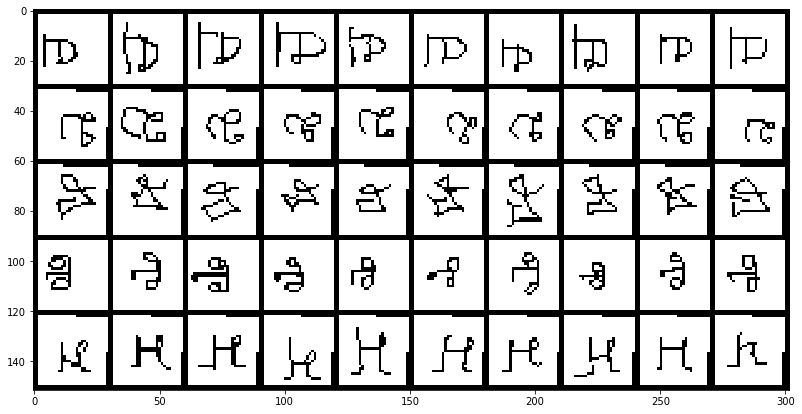

In [10]:
my_sample = data.extract_sample(n_way, n_support, n_query, test_x, test_y)
data.display_sample(my_sample['images'])


In [11]:
my_loss, my_output = model.set_forward_loss(my_sample)

{'loss': 1.4832344277238008e-05, 'acc': 1.0, 'y_hat': tensor([[0, 0, 0, 0, 0],
         [1, 1, 1, 1, 1],
         [2, 2, 2, 2, 2],
         [3, 3, 3, 3, 3],
         [4, 4, 4, 4, 4]])}